In [2]:
import tensorflow as tf
from keras import datasets,layers,models
import matplotlib.pyplot as plt

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar100.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

169001437/169001437 [==============================] - 18s 0us/step


In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dense(100, activation='softmax')
])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 128)         0         
 g2D)                                                   

In [6]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [7]:
history = model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 18s 8ms/step - loss: 4.1054 - accuracy: 0.0616 - val_loss: 3.6428 - val_accuracy: 0.1395
Epoch 2/20
1563/1563 [==============================] - 11s 7ms/step - loss: 3.5538 - accuracy: 0.1511 - val_loss: 3.2627 - val_accuracy: 0.2159
Epoch 3/20
1563/1563 [==============================] - 11s 7ms/step - loss: 3.2148 - accuracy: 0.2146 - val_loss: 2.9643 - val_accuracy: 0.2739
Epoch 4/20
1563/1563 [==============================] - 12s 7ms/step - loss: 2.9781 - accuracy: 0.2590 - val_loss: 2.8045 - val_accuracy: 0.3036
Epoch 5/20
1563/1563 [==============================] - 11s 7ms/step - loss: 2.7967 - accuracy: 0.2947 - val_loss: 2.7128 - val_accuracy: 0.3221
Epoch 6/20
1563/1563 [==============================] - 11s 7ms/step - loss: 2.6592 - accuracy: 0.3238 - val_loss: 2.6550 - val_accuracy: 0.3377
Epoch 7/20
1563/1563 [==============================] - 10s 7ms/step - loss: 2.5368 - accuracy: 0.3432 - val_loss: 2.5468 - val_accuracy: 0.3

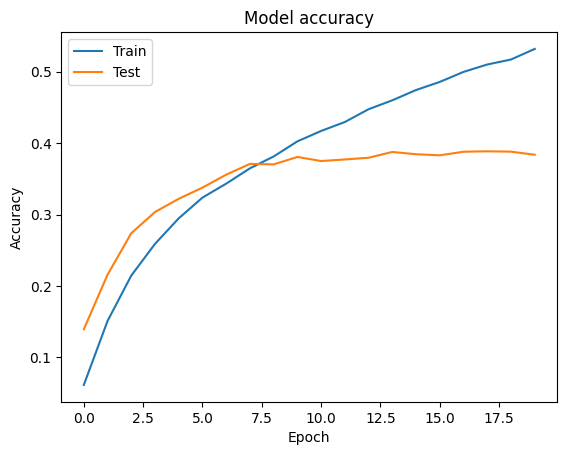

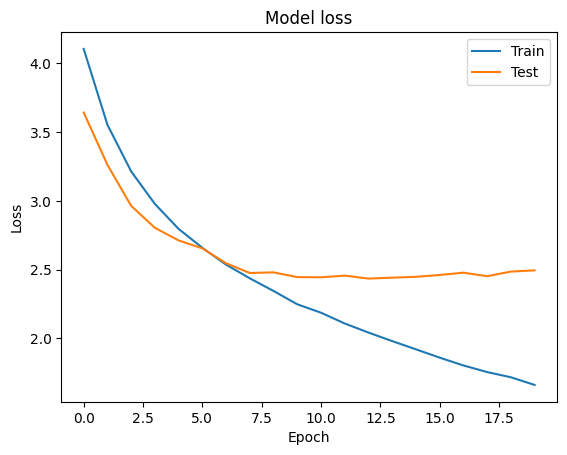

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()
